**THE FOLLOWING IS THE CODE TO DO HEIRARCHICHAL CLUSTERING**

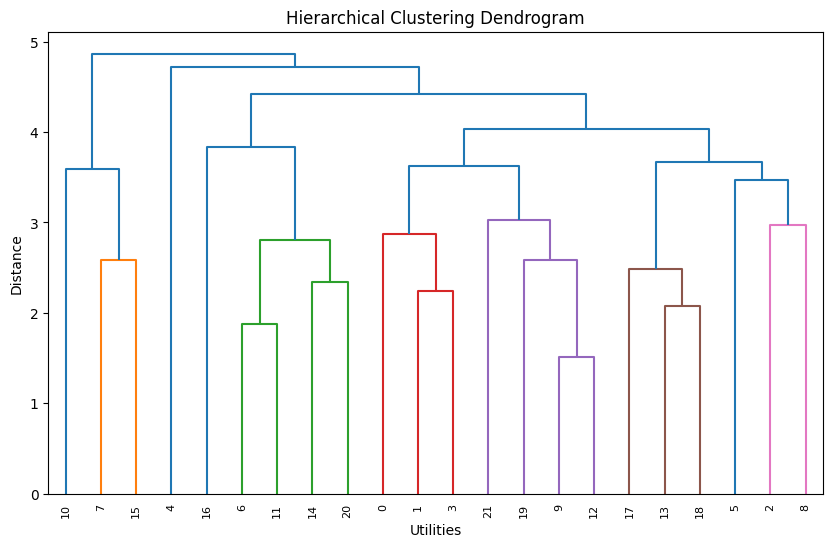

In [2]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel("utilities.xls")

# Extract the features
# Extracting the feature columns from the dataset to form a feature matrix
features = data.iloc[:, 1:].values

# Perform standardization
# Standardizing the feature matrix to ensure all features have the same scale
features_standardized = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

# Perform hierarchical clustering
# Using the standardized feature matrix to perform hierarchical clustering
Z = linkage(features_standardized, method='average', metric='euclidean')

# Plot dendrogram
# Visualizing the hierarchical clustering results using a dendrogram
plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Utilities')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # Rotating leaf labels for better readability
    leaf_font_size=8.,  # Adjusting font size of leaf labels for better readability
)
plt.show()



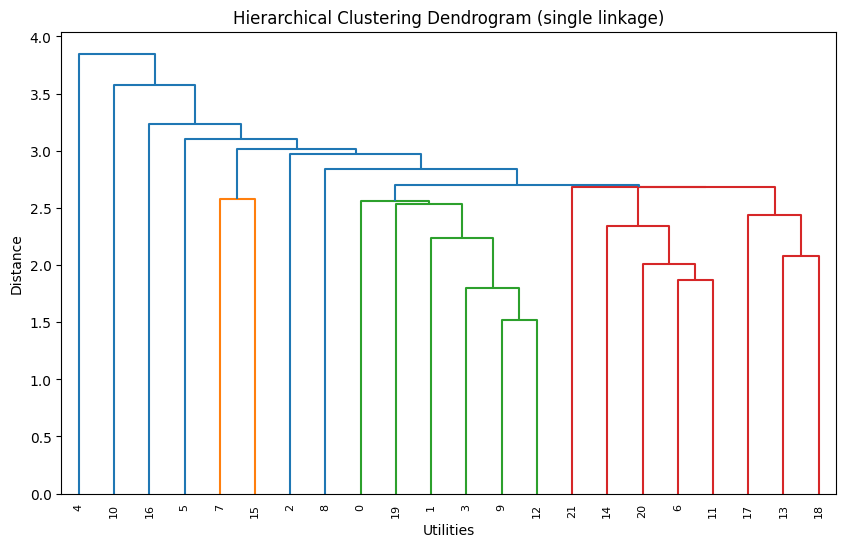

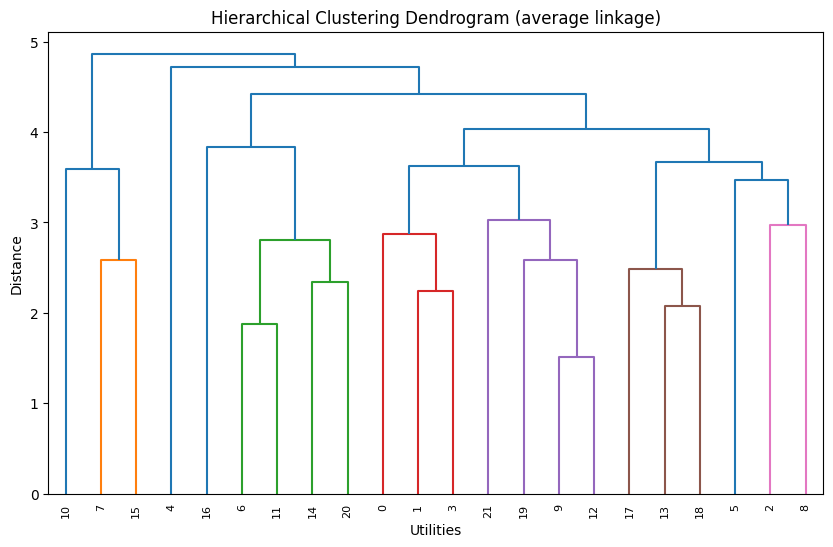

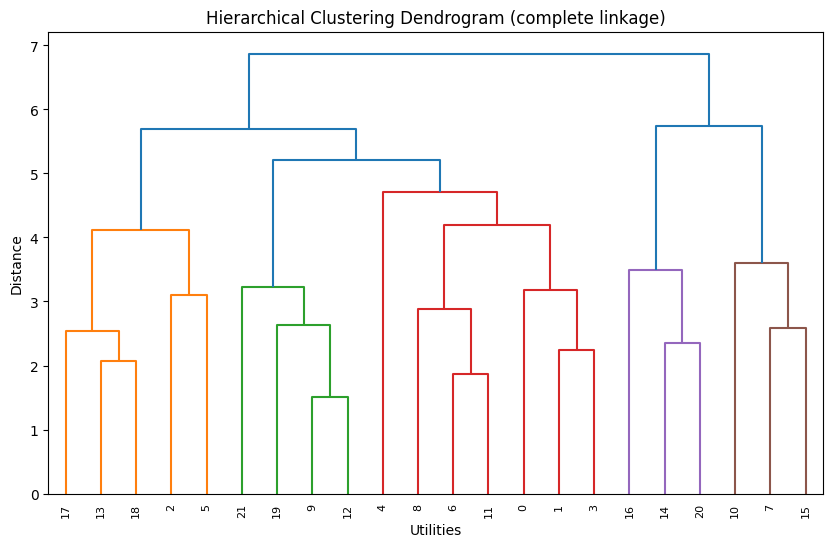

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Define linkage methods
linkage_methods = ['single', 'average', 'complete']

# Perform hierarchical clustering for each method
for method in linkage_methods:
    # Perform hierarchical clustering
    Z = linkage(features_standardized, method=method, metric='euclidean')
    
    # Plot dendrogram
    plt.figure(figsize=(10, 6))
    plt.title(f'Hierarchical Clustering Dendrogram ({method} linkage)')
    plt.xlabel('Utilities')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,  
    )
    plt.show()


**K MEANS FOR K= 4 and 5**

In [4]:
from sklearn.cluster import KMeans

# Number of clusters
k_values = [4, 5]

for k in k_values:
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize KMeans with the specified number of clusters and random state for reproducibility
    kmeans.fit(features_standardized)  # Fit KMeans to the standardized feature matrix
    
    # Get cluster labels
    cluster_labels = kmeans.labels_  # Retrieve the cluster labels assigned by KMeans
    
    # Assign cluster labels to the original dataset
    data_with_clusters = data.copy()  # Create a copy of the original dataset to preserve the original data
    data_with_clusters['Cluster'] = cluster_labels  # Add a new column 'Cluster' to the dataset containing the cluster labels
    
    # Print cluster centers
    print(f"Cluster centers for k={k}:")
    print(kmeans.cluster_centers_)  # Print the centroids (cluster centers) of each cluster
    
    # Print counts of points in each cluster
    print(f"Counts of points in each cluster for k={k}:")
    print(data_with_clusters['Cluster'].value_counts())  # Print the count of data points assigned to each cluster


Cluster centers for k=4:
[[-0.45710404  0.75392394  0.54899019  0.55705241  0.41819301  0.59709733
   0.56296121 -0.73144654 -0.37276388]
 [ 0.92997028 -0.67727081 -0.99266051  0.07499651  0.75775322  0.38045932
  -0.54730279 -0.29501677  1.15048472]
 [-0.61078556  0.23386771  0.22857314  0.07002686 -0.27870844 -0.42783023
  -0.55416481  1.00726283 -0.18447445]
 [ 0.63048832 -0.56355184  0.09744161 -0.93011489 -0.91251592 -0.36628534
   1.08875661 -0.73144654 -0.60320216]]
Counts of points in each cluster for k=4:
Cluster
2    8
0    5
1    5
3    4
Name: count, dtype: int64
Cluster centers for k=5:
[[-0.82751593  1.18383709  1.27192403 -0.65678422  0.75087025 -0.19395965
   0.05267744 -0.38858097  0.18501825]
 [ 0.74870489 -0.7854425  -1.0770408   0.05760274  1.10075492  0.25736954
  -0.76910763 -0.59125262  1.34457192]
 [-0.57419472  0.1041013   0.08115198  0.2830118  -0.41759708 -0.23381729
  -0.72447976  1.05972671 -0.247185  ]
 [ 0.86692145 -0.07816603  0.62196774 -1.28006097 -0.7

**FOR K=4 Clusters and thier contents**

In [5]:
# Perform k-means clustering for k=4
kmeans = KMeans(n_clusters=4, random_state=42)  # Initialize KMeans with 4 clusters and a random state for reproducibility
kmeans.fit(features_standardized)  # Fit KMeans to the standardized feature matrix

# Get cluster labels
cluster_labels_kmeans = kmeans.labels_  # Retrieve the cluster labels assigned by KMeans

# Assign cluster labels to the original dataset
data_with_clusters_kmeans = data.copy()  # Create a copy of the original dataset to preserve the original data
data_with_clusters_kmeans['Cluster'] = cluster_labels_kmeans  # Add a new column 'Cluster' to the dataset containing the cluster labels

# Print the content of each cluster for k-means clustering
for cluster_id in range(4):  # Iterate over each cluster
    print(f"Cluster {cluster_id + 1} for k-means clustering:")  # Print the cluster number
    print(data_with_clusters_kmeans[data_with_clusters_kmeans['Cluster'] == cluster_id])  # Print the data points belonging to the current cluster
    print("\n")  # Print an empty line for separation


Cluster 1 for k-means clustering:
   utility_name  utility    x1    x2   x3    x4   x5     x6   x7     x8  \
2       Central        3  1.43  15.4  113  53.0  3.4   9212  0.0  1.058   
6      Hawaiian        7  1.22  12.2  175  67.6  2.2   7642  0.0  1.652   
7         Idaho        8  1.10   9.2  245  57.0  3.3  13082  0.0  0.309   
8      Kentucky        9  1.34  13.0  168  60.4  7.2   8406  0.0  0.862   
15        Puget       16  1.16   9.9  252  56.0  9.2  15991  0.0  0.620   

    Cluster  
2         0  
6         0  
7         0  
8         0  
15        0  


Cluster 2 for k-means clustering:
   utility_name  utility    x1    x2   x3    x4   x5     x6    x7     x8  \
11     NewEngla       12  1.13  10.9  178  62.0  3.7   6154   0.0  1.897   
14      Pacific       15  0.96   7.6  164  62.2 -0.1   6468   0.9  1.400   
16     SanDiego       17  0.76   6.4  136  61.9  9.0   5714   8.3  1.920   
20       United       21  1.04   8.6  204  61.0  3.5   6650   0.0  2.116   
21     Virginia

**FOR K=5, Clusters and thier contents**

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)  # Initialize KMeans with 5 clusters and a random state for reproducibility
kmeans.fit(features_standardized)  # Fit KMeans to the standardized feature matrix

# Get cluster labels
cluster_labels_kmeans = kmeans.labels_  # Retrieve the cluster labels assigned by KMeans

# Assign cluster labels to the original dataset
data_with_clusters_kmeans = data.copy()  # Create a copy of the original dataset to preserve the original data
data_with_clusters_kmeans['Cluster'] = cluster_labels_kmeans  # Add a new column 'Cluster' to the dataset containing the cluster labels

# Print the content of each cluster for k-means clustering
for cluster_id in range(5):  # Iterate over each cluster
    print(f"Cluster {cluster_id + 1} for k-means clustering:")  # Print the cluster number
    print(data_with_clusters_kmeans[data_with_clusters_kmeans['Cluster'] == cluster_id])  # Print the data points belonging to the current cluster
    print("\n")  # Print an empty line for separation


Cluster 1 for k-means clustering:
  utility_name  utility    x1    x2   x3    x4   x5     x6    x7     x8  \
2      Central        3  1.43  15.4  113  53.0  3.4   9212   0.0  1.058   
5      Florida        6  1.32  13.5  111  60.0 -2.2  11127  22.5  1.241   
6     Hawaiian        7  1.22  12.2  175  67.6  2.2   7642   0.0  1.652   
8     Kentucky        9  1.34  13.0  168  60.4  7.2   8406   0.0  0.862   

   Cluster  
2        0  
5        0  
6        0  
8        0  


Cluster 2 for k-means clustering:
   utility_name  utility    x1    x2   x3    x4   x5    x6   x7     x8  \
11     NewEngla       12  1.13  10.9  178  62.0  3.7  6154  0.0  1.897   
14      Pacific       15  0.96   7.6  164  62.2 -0.1  6468  0.9  1.400   
16     SanDiego       17  0.76   6.4  136  61.9  9.0  5714  8.3  1.920   
20       United       21  1.04   8.6  204  61.0  3.5  6650  0.0  2.116   

    Cluster  
11        1  
14        1  
16        1  
20        1  


Cluster 3 for k-means clustering:
   utility_n

**CONCLUSION: K=5 matches with Avarage link**

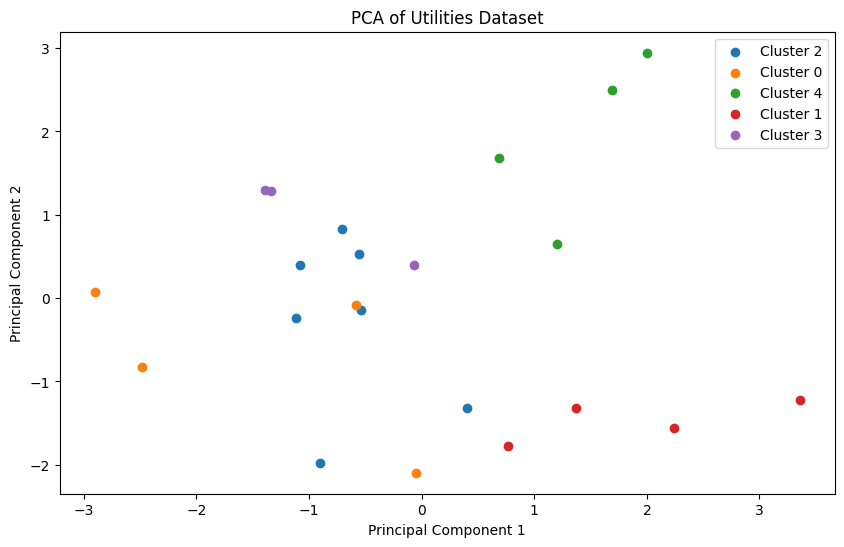

In [28]:
from sklearn.decomposition import PCA

# Number of components (can be less than the number of features)
n_components = 2  # You can adjust this as needed

# Perform PCA
pca = PCA(n_components=n_components)  # Initialize PCA with the specified number of components
principal_components = pca.fit_transform(features_standardized)  # Fit PCA to the standardized feature matrix and transform it to principal components

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])  # Adjust column names based on n_components

# Concatenate the principal components with the cluster labels
final_df = pd.concat([principal_df, data_with_clusters['Cluster']], axis=1)  # Concatenate principal components DataFrame with the cluster labels

# Plot the principal components
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
for cluster in final_df['Cluster'].unique():  # Iterate over each unique cluster label
    plt.scatter(final_df.loc[final_df['Cluster'] == cluster, 'PC1'],  # Scatter plot of PC1 for the current cluster
                final_df.loc[final_df['Cluster'] == cluster, 'PC2'],  # Scatter plot of PC2 for the current cluster
                label=f'Cluster {cluster}')  # Label the scatter plot with the cluster number
plt.xlabel('Principal Component 1')  # Set label for x-axis
plt.ylabel('Principal Component 2')  # Set label for y-axis
plt.title('PCA of Utilities Dataset')  # Set title for the plot
plt.legend()  # Show legend
plt.show()  # Display the plot


In [29]:
from sklearn.decomposition import PCA

# Number of principal components
n_components = 4

# Initialize PCA with the desired number of components
pca = PCA(n_components=n_components)

# Fit PCA to the standardized features
pca.fit(features_standardized)

# Transform the data to the new feature space
features_pca = pca.transform(features_standardized)

# Print explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)  # Print the explained variance ratio for each principal component


Explained Variance Ratio:
[0.25577408 0.21387788 0.14795354 0.11356504]


**A hierarchical clustering algorithm groups similar items together by comparing how much they resemble each other. Principal components capture the main patterns in the data. Sometimes, especially with complex data, the main patterns identified by principal components also separate different groups of items. So, in those cases, both hierarchical clustering and principal components provide similar insights..**

**In Our Case as well, the PCA and hierarchical clustering tend to align**